In [47]:
#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [48]:
#importing the data set
dataset = pd.read_csv('ML-EdgeIIoT-dataset.csv', low_memory=False)

X = dataset.iloc[:, 3:-2].values #Selecting colomns from index 3 to the second last column as features
Y = dataset.iloc[:, -1].values #Selecting the last column as label



In [49]:
# 2. CONVERSION & INFINITY FIX (The crucial part)
# Convert to a DataFrame first to use powerful cleaning tools
X_df = pd.DataFrame(X)

# Convert all text to numbers, turning errors into 'NaN'
X_df = X_df.apply(pd.to_numeric, errors='coerce')

# Replace 'Infinity' or '-Infinity' with 'NaN'
X_df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Fill all NaNs (and the infinities we just removed) with 0
X_df.fillna(0, inplace=True)

# This caps giant numbers at a safe limit for float32
X_df = X_df.clip(lower=-1e38, upper=1e38)

# Convert to float32 (the exact format the error is asking for)
X_clean = X_df.values.astype(np.float32)

# Convert back to a clean numpy array for the AI
X = X_df.values


In [50]:
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder

# Turning names into numbers
le = LabelEncoder()
Y = le.fit_transform(Y)

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

In [52]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators = 100, random_state = 42)
classifier.fit(X_train, Y_train)

Y_pred = classifier.predict(X_test)


In [53]:
#Making the confusion matrix and the accuracy, precision
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score
cm=confusion_matrix(Y_test,Y_pred)
print(cm)
#Accuracy
accuracy_score(Y_test,Y_pred)

[[1916    0    0    0    0    0   35    0    0   22    0    0    0    0
     0]
 [   0 1795    0    0    0    0    0    0   79    0    0  164   36    8
    47]
 [   0    0 2836    0    0    0    0    0    0    0    0    0    0    0
     0]
 [   0    0    0 1961    0    0    0    0    0    0    0    0    0    0
     0]
 [   0    0    0    0 2904    0    0    0    0    0    0    0    0    0
     0]
 [   0    0    0    0    0  166    9    0    0   22    0    0    0    0
     0]
 [   0    0    0    0    0    0  255    0    0    0    0    0    0    0
     0]
 [   0    0    0    0    0    0   15 4960    0   10    0    0    0    0
     0]
 [   0  105    0    0    0    0    0    0 1668    0    0  128   23   22
    27]
 [   0    0    0    0    0    0   83    0    0 2045    0    0    0    0
     0]
 [   2    0    0    0    0    0  133    0    0  113 1813    0    0    0
     0]
 [   0  153    0    0    0    0    2    0   63    0    0 1871    0    0
     0]
 [   0   38    0    0    0    0    3    

0.944106463878327

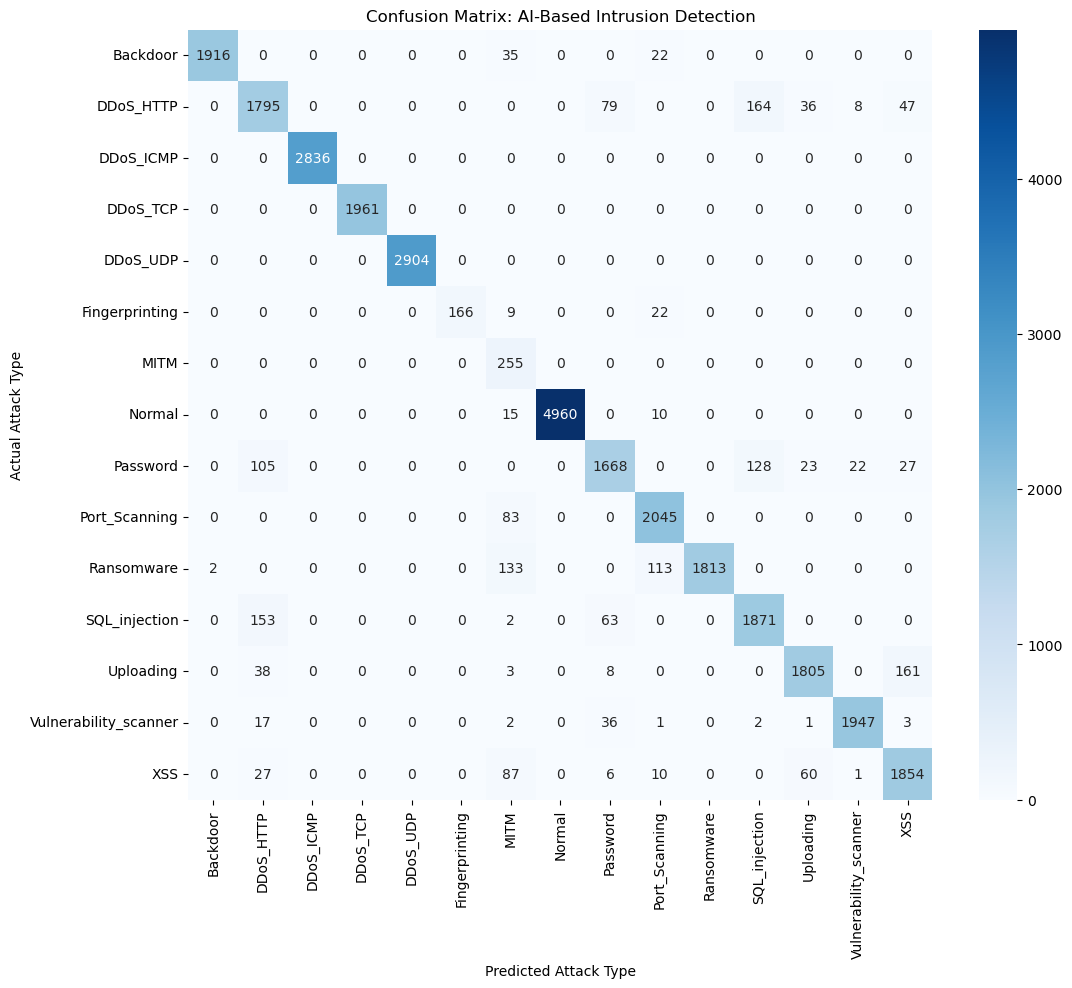


Detailed Performance Report:
                       precision    recall  f1-score   support

             Backdoor       1.00      0.97      0.98      1973
            DDoS_HTTP       0.84      0.84      0.84      2129
            DDoS_ICMP       1.00      1.00      1.00      2836
             DDoS_TCP       1.00      1.00      1.00      1961
             DDoS_UDP       1.00      1.00      1.00      2904
       Fingerprinting       1.00      0.84      0.91       197
                 MITM       0.41      1.00      0.58       255
               Normal       1.00      0.99      1.00      4985
             Password       0.90      0.85      0.87      1973
        Port_Scanning       0.92      0.96      0.94      2128
           Ransomware       1.00      0.88      0.94      2061
        SQL_injection       0.86      0.90      0.88      2089
            Uploading       0.94      0.90      0.92      2015
Vulnerability_scanner       0.98      0.97      0.98      2009
                  XSS   

In [54]:
import seaborn as sns

# Plotting the Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)

plt.title('Confusion Matrix: AI-Based Intrusion Detection')
plt.ylabel('Actual Attack Type')
plt.xlabel('Predicted Attack Type')
plt.show()

# 3. Print a detailed Report for your Discussion section
from sklearn.metrics import classification_report
print("\nDetailed Performance Report:")
print(classification_report(Y_test, Y_pred, target_names=le.classes_))